## Tarea 6. Estimación Paramétrica.
## Iker Bali Elizalde
## A01656437

In [137]:
### Importo Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sps
from scipy.optimize import fsolve

# Importo datos

rain_pre=pd.read_csv("https://raw.githubusercontent.com/jamezcuae/Datos/main/raindata.csv")

# Datos Originales

rain=np.array(rain_pre)

# Defino variables


# quitar datos faltantes (9999 es faltante) y datos=0

ind_valid=np.logical_and(rain[:,1]<9000,rain[:,1]>0)
rain_valid=rain[ind_valid,:]
M=np.size(rain_valid[:,1])
theta=np.linspace(1,10,201)



Empiezo a graficar...

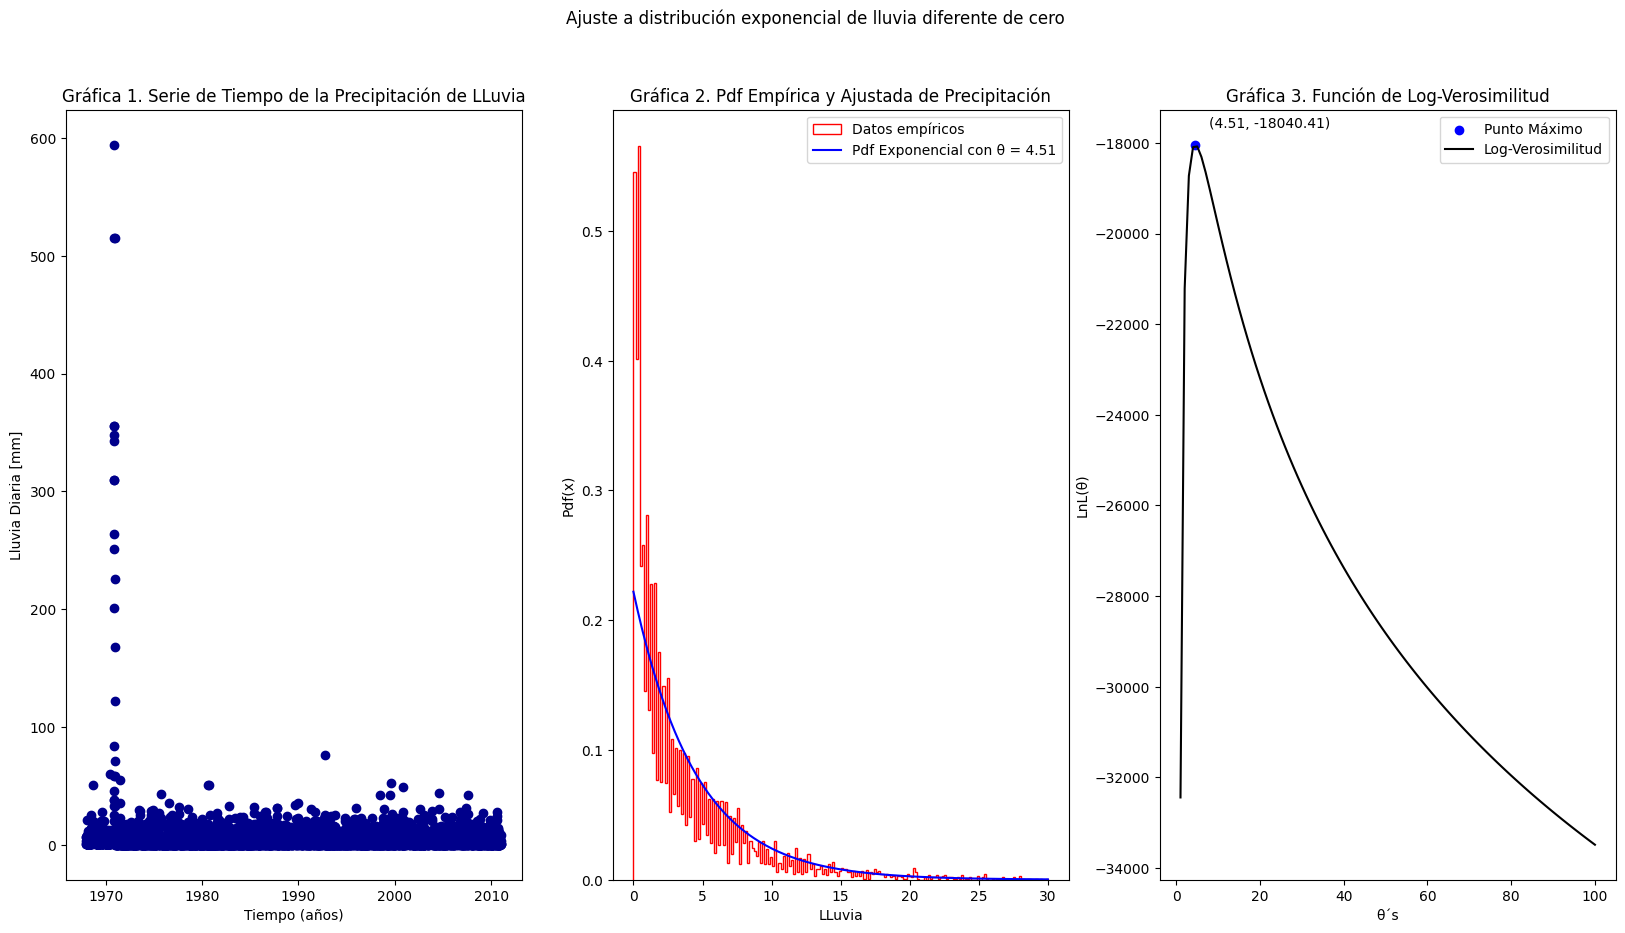

In [155]:


plt.figure(figsize=(20, 10))


# Series de tiempo
plt.subplot(1,3,1)
rain_valid=rain[ind_valid,:]
plt.scatter(rain_valid[:,0],rain_valid[:,1],color="darkblue")
plt.xlabel("Tiempo (años)")
plt.ylabel("Lluvia Diaria [mm]")
plt.title("Gráfica 1. Serie de Tiempo de la Precipitación de LLuvia")

# Función de Probabilidad Exponencial y Datos Empíricos

plt.subplot(1,3,2)
X=np.linspace(0,30,201)
xbarra=np.mean(rain_valid[:,1])
pdf=1/xbarra* np.exp(-X/xbarra)
paramtheta=str(round(xbarra,2))
plt.hist(rain_valid[:,1],bins=X,density=True,histtype="step",color="red",label="Datos empíricos")
plt.plot(X, pdf, color="blue", label="Pdf Exponencial con \u03B8 = "+ paramtheta)
plt.xlabel("LLuvia")
plt.ylabel("Pdf(x)")
plt.title("Gráfica 2. Pdf Empírica y Ajustada de Precipitación")
plt.legend()


# Grafica verosimilitud 

plt.subplot(1,3,3)
angulo=np.linspace(1,100,100)
L = -M*np.log(angulo) - (M*xbarra/angulo)
thetamax=xbarra
ymax=-M*np.log(xbarra) - (M*xbarra/xbarra)
plt.scatter(thetamax,ymax,color="blue",label="Punto Máximo")
plt.plot(angulo,L,color="black",label="Log-Verosimilitud")
plt.title("Gráfica 2. Pdf Empírica y Ajustada de Precipitación")
valor_punto = round(thetamax, 2), round(ymax, 2)
plt.annotate(f"{valor_punto}", (thetamax, ymax), xytext=(10, 10),
             textcoords='offset points', ha='left', va='bottom')
plt.xlabel("\u03B8´s")
plt.ylabel("LnL(\u03B8)")
plt.title("Gráfica 3. Función de Log-Verosimilitud")
plt.legend()
plt.suptitle("Ajuste a distribución exponencial de lluvia diferente de cero")
plt.show()